In [2]:
# Code in file autograd/two_layer_net_autograd.py
import torch

device = torch.device('cpu')
# device = torch.device('cuda') # Uncomment this to run on GPU

In [3]:
import numpy as np

In [4]:
R_exps = [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
N = 200 # input dimension and number of training behaviors
M = N # output dimension

In [5]:
# Define nonlinear activation function
def f(x): # nonlinear conversion function to binary
    return x.sigmoid()#tanh().add(1).div(2)

In [6]:
# Create input data
x = torch.tensor(np.genfromtxt("x_{}.csv".format(N), delimiter=','), device=device).float()
y = torch.tensor(np.genfromtxt("y_{}.csv".format(N), delimiter=','), device=device).float()

Find optimal learning rates for each R

In [7]:
# determine lrs_N200 = [2500, 1000, 650, 100, 100, 100, 100, 100, 100, 100]

In [70]:
loss_all_lr = []
for learning_rate in [2500]: # try different learning rates for different R and look at behavior of loss
    R = int(N**1) # 
    # Create random Tensors for weights; setting requires_grad=True means that we
    # want to compute gradients for these Tensors during the backward pass.
    w1 = torch.randn(N, R, device=device, requires_grad=True).float()
    w2 = torch.randn(R, M, device=device, requires_grad=True).float()

    ## initialize tensor variables for bias terms 
    b1 = torch.randn(1, R, device=device, requires_grad=True).float()# bias for hidden layer
    b2 = torch.randn(1, M, device=device, requires_grad=True).float() # bias for output layer

    t = 0
    loss = 1000
    loss_all = []
    while t < 40000:
      # Forward pass: compute predicted y using operations on Tensors. Since w1 and
      # w2 have requires_grad=True, operations involving these Tensors will cause
      # PyTorch to build a computational graph, allowing automatic computation of
      # gradients. Since we are no longer implementing the backward pass by hand we
      # don't need to keep references to intermediate values.
      y_pred = f(f(x.mm(w1).add(b1)).mm(w2).add(b2))

      # Compute and print loss. Loss is a Tensor of shape (), and loss.item()
      # is a Python number giving its value.
      loss = (y_pred - y).pow(2).mean()
      loss_all.append(loss.item())
      # print(t, loss.item())

      # Use autograd to compute the backward pass. This call will compute the
      # gradient of loss with respect to all Tensors with requires_grad=True.
      # After this call w1.grad and w2.grad will be Tensors holding the gradient
      # of the loss with respect to w1 and w2 respectively.
      loss.backward()

      # Update weights using gradient descent. For this step we just want to mutate
      # the values of w1 and w2 in-place; we don't want to build up a computational
      # graph for the update steps, so we use the torch.no_grad() context manager
      # to prevent PyTorch from building a computational graph for the updates
      with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        b1 -= learning_rate * b1.grad
        b2 -= learning_rate * b2.grad

        # Manually zero the gradients after running the backward pass
        w1.grad.zero_()
        w2.grad.zero_()
        b1.grad.zero_()
        b2.grad.zero_()
        t = t + 1
    loss_all_lr.append(loss_all)

No handles with labels found to put in legend.


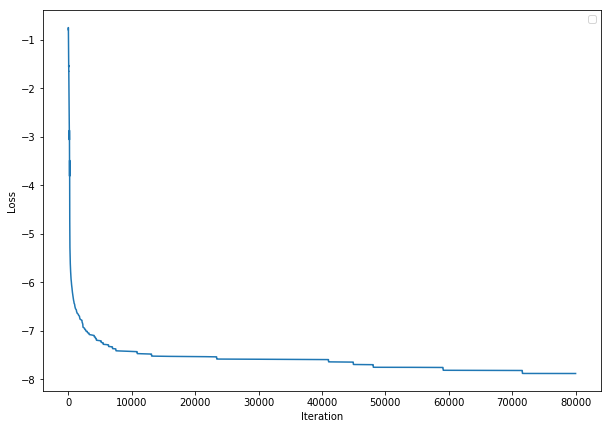

In [71]:
import matplotlib
from matplotlib import pyplot as plt
plt.figure(figsize=(10,7))
for i in range(len(loss_all_lr)):
    plt.plot(np.log(np.array(loss_all_lr[i])))
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Loss')
#plt.ylim([0, 0.5])
plt.show()

In [75]:
185/200

0.925

In [76]:
94/100

0.94

In [74]:
# Computing binary outputs using different thresholds
import difflib
y_pred = y_pred.detach().numpy()
threshold = 0.5
percent_seqmatch = [0.99]
behaviours_learnt = []
for per in percent_seqmatch:
    behaviour = 0

    y_pred_binary = np.abs(np.round(y_pred+0.5-threshold))

    for j in range(len(y_pred)):
        s = difflib.SequenceMatcher(None, y[j],y_pred_binary[j])
        if s.ratio() > per:
            behaviour += 1
    behaviours_learnt.append(behaviour/N)

AttributeError: 'numpy.ndarray' object has no attribute 'detach'

In [73]:
behaviour

185

After finding the optimal learning rates, run 10 trials (with different random weights initializations) for each R

In [53]:
lrs_N200 = [2500, 1000, 650, 100, 100, 100, 100, 100, 100, 100]

In [ ]:
loss_all_R_trials = []
y_pred_all_R_trials = []
for f_ind, ff in enumerate(R_exps[:]):
    print(ff)
    R = int(N**ff)
    learning_rate = lrs_N200[f_ind]
    loss_all_trials = []
    y_pred_all_trials = []
    for trial in range(10):
        print(trial)
        # Create random Tensors for weights; setting requires_grad=True means that we
        # want to compute gradients for these Tensors during the backward pass.
        w1 = torch.randn(N, R, device=device, requires_grad=True).float()
        w2 = torch.randn(R, M, device=device, requires_grad=True).float()

        ## initialize tensor variables for bias terms 
        b1 = torch.randn(1, R, device=device, requires_grad=True).float()# bias for hidden layer
        b2 = torch.randn(1, M, device=device, requires_grad=True).float() # bias for output layer

        t = 0
        loss = 1000
        loss_all = []
        while t < 40000:
          # Forward pass: compute predicted y using operations on Tensors. Since w1 and
          # w2 have requires_grad=True, operations involving these Tensors will cause
          # PyTorch to build a computational graph, allowing automatic computation of
          # gradients. Since we are no longer implementing the backward pass by hand we
          # don't need to keep references to intermediate values.
          y_pred = f(f(x.mm(w1).add(b1)).mm(w2).add(b2))

          # Compute and print loss. Loss is a Tensor of shape (), and loss.item()
          # is a Python number giving its value.
          loss = (y_pred - y).pow(2).mean()
          loss_all.append(loss.item())
          # print(t, loss.item())

          # Use autograd to compute the backward pass. This call will compute the
          # gradient of loss with respect to all Tensors with requires_grad=True.
          # After this call w1.grad and w2.grad will be Tensors holding the gradient
          # of the loss with respect to w1 and w2 respectively.
          loss.backward()

          # Update weights using gradient descent. For this step we just want to mutate
          # the values of w1 and w2 in-place; we don't want to build up a computational
          # graph for the update steps, so we use the torch.no_grad() context manager
          # to prevent PyTorch from building a computational graph for the updates
          with torch.no_grad():
            w1 -= learning_rate * w1.grad
            w2 -= learning_rate * w2.grad
            b1 -= learning_rate * b1.grad
            b2 -= learning_rate * b2.grad

            # Manually zero the gradients after running the backward pass
            w1.grad.zero_()
            w2.grad.zero_()
            b1.grad.zero_()
            b2.grad.zero_()
            t = t + 1
        loss_all_trials.append(loss.detach().numpy())
        y_pred_all_trials.append(y_pred.detach().numpy())
    y_pred_all_R_trials.append(y_pred_all_trials)
    loss_all_R_trials.append(loss_all_trials)

1.0
0
1
2
3
4
5
6
7
8
9
0.9
0
1
2
3
4
5
6
7
8
9
0.8
0
1
2
3
4
5
6
7
8
9
0.7
0
1
2
3
4
5
6
7
8
9
0.6
0
1
2
3
4
5
6
7
8
9
0.5
0
1
2
3
4
5
6
7
8
9
0.4
0
1
2
3
4
5
6
7
8
9
0.3
0


In [185]:
# Computing binary outputs using different thresholds
import difflib
behavior_all_R_trials = []
for R_ind, y_pred_all_trials in enumerate(y_pred_all_R_trials):
    print(R_ind)
    behaviour_all_trials = []
    for y_pred in y_pred_all_trials:
        threshold = 0.5
        percent_seqmatch = [0.99]
        behaviours_learnt = []
        for per in percent_seqmatch:
            behaviour = 0

            y_pred_binary = np.abs(np.round(y_pred+0.5-threshold))

            for j in range(len(y_pred)):
                s = difflib.SequenceMatcher(None, y[j],y_pred_binary[j])
                if s.ratio() > per:
                    behaviour += 1
            behaviours_learnt.append(behaviour/N)
        behaviour_all_trials.append(behaviour)
    behavior_all_R_trials.append(behaviour_all_trials)

0
1
2
3
4
5
6
7
8
9
